# Import impotent moduls 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from scipy.cluster.hierarchy import dendrogram, linkage

# import test data

In [2]:
test = pd.read_csv("test.csv")

In [3]:
test.shape

(2627, 10)

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


# import tarin data

In [5]:
data = pd.read_csv("train.csv")

In [6]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [11]:
data.shape

(8068, 11)

In [12]:
data.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2136,459050,Female,No,19,No,Healthcare,0.0,Low,3.0,Cat_6,D
7872,462673,Female,No,28,No,Homemaker,8.0,Low,NaN,Cat_6,D
1915,464737,Female,Yes,58,No,Engineer,0.0,Average,6.0,Cat_4,A
7954,465415,Male,No,31,No,Artist,0.0,Low,7.0,Cat_2,C
5831,467763,Female,No,48,Yes,Artist,1.0,Low,1.0,Cat_2,B


In [13]:
df = pd.read_csv("train.csv",index_col = [0])

In [14]:
df.sample(4)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
460368,Male,No,28,Yes,Healthcare,0.0,Low,7.0,Cat_6,C
467440,Male,Yes,49,Yes,Entertainment,0.0,Low,1.0,Cat_6,A
460793,Female,Yes,28,No,Artist,NaN,Low,3.0,Cat_3,B
459362,Male,Yes,55,No,Executive,0.0,Low,2.0,Cat_6,A


In [15]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [16]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [17]:
df["Ever_Married"].fillna(method = "ffill", inplace = True)
df['Profession'].fillna(method='ffill',inplace=True)
df['Graduated'].fillna(method='bfill',inplace=True)
df['Work_Experience'].fillna(method='bfill',inplace=True)
df['Family_Size'].fillna(method='bfill',inplace=True)

In [18]:
df.isnull().sum()

Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              76
Segmentation        0
dtype: int64

In [19]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [20]:
#train1 = df[["Gender","Ever_Married","Age","Profession","Graduated","Work_Experience","Spending_Score","Family_Size"]]
train2 = df.drop(columns = ["Var_1","Segmentation"],axis = 1)

In [21]:
train2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0
462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0
...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,Artist,0.0,Low,7.0
464685,Male,No,35,No,Executive,3.0,Low,4.0
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0


In [22]:
train2.groupby("Profession").mean()

,Age,Work_Experience,Family_Size
Profession,,,
Artist,46.189432,2.701761,2.523288
Doctor,37.311522,2.621622,2.880512
Engineer,41.762784,2.562500,2.974432
Entertainment,43.056075,2.686397,2.785047
Executive,51.089256,2.305785,3.418182
Healthcare,27.038433,2.557280,3.637103
Homemaker,38.244000,5.952000,2.316000
Lawyer,74.630503,1.391509,1.992138
Marketing,37.006689,2.545151,3.073579


In [23]:
train2.groupby("Graduated").mean()

,Age,Work_Experience,Family_Size
Graduated,,,
No,38.440617,2.451115,3.292651
Yes,46.518725,2.720120,2.582869


In [24]:
train2.groupby("Ever_Married").mean()

,Age,Work_Experience,Family_Size
Ever_Married,,,
No,32.377764,2.953078,2.990436
Yes,51.324651,2.381406,2.752224


In [25]:
train2.groupby("Spending_Score").mean()

,Age,Work_Experience,Family_Size
Spending_Score,,,
Average,46.868288,2.513171,3.102330
High,57.777138,2.162007,2.989309
Low,38.523165,2.774908,2.714842


In [26]:
train2.groupby("Gender").mean()

,Age,Work_Experience,Family_Size
Gender,,,
Female,42.911531,2.810463,2.758422
Male,43.925968,2.459814,2.927553


# Preprocessing data

#Diffrent way
#train2['Profession']=train2['Profession'].map({'Artist':0, 
                                               'Doctor':1, 
                                               'Engineer':2,
                                               'Entertainment':3,
                                               'Executive':4,
                                               'Healthcare':5,
                                               'Homemaker':6,
                                               'Lawyer':7, 
                                               'Marketing':8})
train2.head()

In [27]:
train2.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0
462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0


In [28]:
#using module
from sklearn.preprocessing import LabelEncoder

In [29]:
train2["Profession"] = LabelEncoder().fit_transform(train2["Profession"])
train2["Graduated"] = LabelEncoder().fit_transform(train2["Graduated"])
train2["Ever_Married"] = LabelEncoder().fit_transform(train2["Ever_Married"])
train2["Spending_Score"] = LabelEncoder().fit_transform(train2["Spending_Score"])
train2["Gender"] = LabelEncoder().fit_transform(train2["Gender"])

In [30]:
train2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,1,0,22,0,5,1.0,2,4.0
462643,0,1,38,1,2,1.0,0,3.0
466315,0,1,67,1,2,1.0,2,1.0
461735,1,1,67,1,7,0.0,1,2.0
462669,0,1,40,1,3,0.0,1,6.0
...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0.0,2,7.0
464685,1,0,35,0,4,3.0,2,4.0
465406,0,0,33,1,5,1.0,2,1.0


In [31]:
train2.corr().round(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,1.00,0.11,0.03,-0.03,0.03,-0.05,-0.05,0.06
Ever_Married,0.11,1.00,0.56,0.19,-0.14,-0.08,-0.62,-0.08
Age,0.03,0.56,1.00,0.23,0.04,-0.17,-0.27,-0.27
Graduated,-0.03,0.19,0.23,1.00,-0.29,0.04,-0.15,-0.22
Profession,0.03,-0.14,0.04,-0.29,1.00,-0.02,0.23,0.08
Work_Experience,-0.05,-0.08,-0.17,0.04,-0.02,1.00,0.04,-0.06
Spending_Score,-0.05,-0.62,-0.27,-0.15,0.23,0.04,1.00,-0.11
Family_Size,0.06,-0.08,-0.27,-0.22,0.08,-0.06,-0.11,1.00


<AxesSubplot:title={'center':'Correlation Map'}>

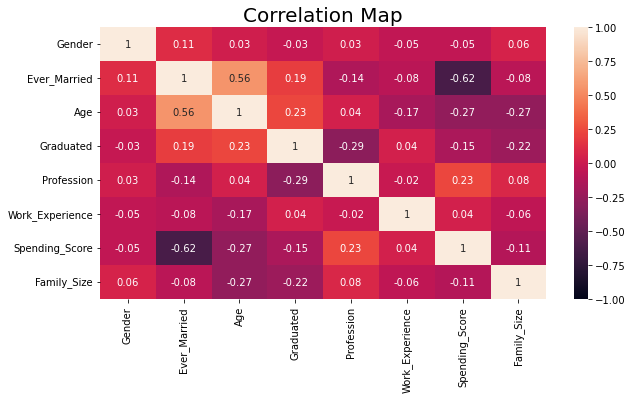

In [32]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title("Correlation Map", fontsize = 20)
sns.heatmap(train2.corr().round(2),vmin=-1,vmax=1,annot=True)


In [33]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()

In [34]:
train2 = stand.fit_transform(train2)

In [35]:
train2

array([[ 0.90916397, -1.18795509, -1.28462344, ..., -0.4784402 ,
         0.754462  ,  0.75103849],
       [-1.0999116 ,  0.84178266, -0.32715082, ..., -0.4784402 ,
        -1.60301259,  0.09738385],
       [-1.0999116 ,  0.84178266,  1.40826831, ..., -0.4784402 ,
         0.754462  , -1.20992543],
       ...,
       [-1.0999116 , -1.18795509, -0.62636101, ..., -0.4784402 ,
         0.754462  , -1.20992543],
       [-1.0999116 , -1.18795509, -0.98541324, ..., -0.4784402 ,
         0.754462  ,  0.75103849],
       [ 0.90916397,  0.84178266, -0.38699286, ..., -0.77404868,
        -1.60301259,  0.09738385]])

link=linkage(stand.transform(train2),'ward')
plt.figure(figsize=(20,20))
dendrogram(link,p=5)
plt.ylabel('Distance')
plt.title('Hierarchitical Segmentation')
plt.show()

In [36]:
train2 = pd.DataFrame(train2)
train2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8068 non-null   float64
 1   1       8068 non-null   float64
 2   2       8068 non-null   float64
 3   3       8068 non-null   float64
 4   4       8068 non-null   float64
 5   5       8068 non-null   float64
 6   6       8068 non-null   float64
 7   7       8068 non-null   float64
dtypes: float64(8)
memory usage: 504.4 KB


In [37]:
from sklearn.cluster import KMeans

In [38]:
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i, random_state =1)
    km = km.fit(stand.fit_transform(train2))
    wcss.append(km.inertia_)

Text(0.5, 0, 'Segmentation Range')

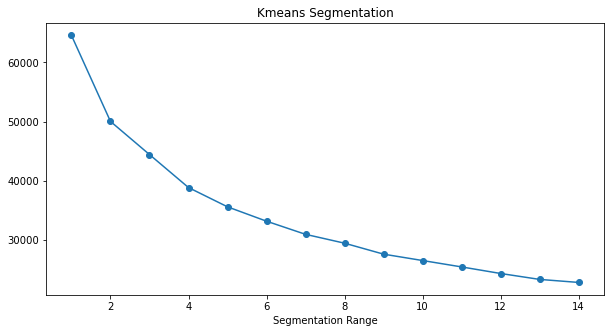

In [39]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss,marker='o')
plt.title('Kmeans Segmentation')
plt.xlabel('Segmentation Range')

In [40]:
from kneed import KneeLocator

In [41]:
kn = KneeLocator(range(1,15),wcss,curve= "convex" ,direction = "decreasing")

In [42]:
kn.knee

5

In [43]:
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(stand.fit_transform(train2))
kmeans.labels_


array([2, 4, 1, ..., 1, 2, 4])

In [44]:
kmeans_segment = pd.DataFrame(train2)
kmeans_segment["Segmentation"] = kmeans.labels_ 
kmeans_segment


,0,1,2,3,4,5,6,7,Segmentation
0,0.909164,-1.187955,-1.284623,-1.283348,0.868890,-0.478440,0.754462,0.751038,2
1,-1.099912,0.841783,-0.327151,0.779212,-0.311875,-0.478440,-1.603013,0.097384,4
2,-1.099912,0.841783,1.408268,0.779212,-0.311875,-0.478440,0.754462,-1.209925,1
3,0.909164,0.841783,1.408268,0.779212,1.656066,-0.774049,-0.424275,-0.556271,3
4,-1.099912,0.841783,-0.207467,0.779212,0.081713,-0.774049,-0.424275,2.058348,4
...,...,...,...,...,...,...,...,...,...
8063,0.909164,-1.187955,-1.284623,-1.283348,-1.099052,-0.774049,0.754462,2.712002,2
8064,0.909164,-1.187955,-0.506677,-1.283348,0.475301,0.112777,0.754462,0.751038,2
8065,-1.099912,-1.187955,-0.626361,0.779212,0.868890,-0.478440,0.754462,-1.209925,1
8066,-1.099912,-1.187955,-0.985413,0.779212,0.868890,-0.478440,0.754462,0.751038,2


In [45]:
kmeans_segment =kmeans_segment.rename(columns={0:"Gender",
                                               1:"Ever_Married",
                                               2:"Age",
                                               3:"Graduated",
                                               4:"Profession",
                                               5:"Work_Experience",
                                               6:"Spending_Score",
                                               7:"Family_Size"})

In [46]:
kmeans_segment

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.909164,-1.187955,-1.284623,-1.283348,0.868890,-0.478440,0.754462,0.751038,2
1,-1.099912,0.841783,-0.327151,0.779212,-0.311875,-0.478440,-1.603013,0.097384,4
2,-1.099912,0.841783,1.408268,0.779212,-0.311875,-0.478440,0.754462,-1.209925,1
3,0.909164,0.841783,1.408268,0.779212,1.656066,-0.774049,-0.424275,-0.556271,3
4,-1.099912,0.841783,-0.207467,0.779212,0.081713,-0.774049,-0.424275,2.058348,4
...,...,...,...,...,...,...,...,...,...
8063,0.909164,-1.187955,-1.284623,-1.283348,-1.099052,-0.774049,0.754462,2.712002,2
8064,0.909164,-1.187955,-0.506677,-1.283348,0.475301,0.112777,0.754462,0.751038,2
8065,-1.099912,-1.187955,-0.626361,0.779212,0.868890,-0.478440,0.754462,-1.209925,1
8066,-1.099912,-1.187955,-0.985413,0.779212,0.868890,-0.478440,0.754462,0.751038,2


In [47]:
kmeans_segment_group = kmeans_segment.groupby("Segmentation").mean().round(2)

In [48]:
kmeans_segment_group

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Segmentation,,,,,,,,
0,-0.18,-0.41,-0.43,0.16,-0.03,1.83,0.51,-0.33
1,-0.14,-0.31,-0.06,0.54,-0.56,-0.45,0.75,-0.65
2,0.03,-1.02,-1.00,-0.95,0.59,-0.31,0.71,0.83
3,0.20,0.75,1.66,-0.14,1.20,-0.41,0.06,-0.46
4,0.08,0.84,0.23,0.29,-0.56,-0.14,-1.36,0.24


In [49]:
kmeans_segment_group.rename({0:'Average',1:'Low',2:'work & spend',3:'Good Profeesion',4:"Great Profeesion"},inplace=True)


In [50]:
kmeans_segment_group

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Segmentation,,,,,,,,
Average,-0.18,-0.41,-0.43,0.16,-0.03,1.83,0.51,-0.33
Low,-0.14,-0.31,-0.06,0.54,-0.56,-0.45,0.75,-0.65
work & spend,0.03,-1.02,-1.00,-0.95,0.59,-0.31,0.71,0.83
Good Profeesion,0.20,0.75,1.66,-0.14,1.20,-0.41,0.06,-0.46
Great Profeesion,0.08,0.84,0.23,0.29,-0.56,-0.14,-1.36,0.24
